주식 데이터를 받아서 시가/고가/거래량의 평균을 구하세요

다음 배열의 shape을 구하세요
[[1,2,3,],
[2,3,4]]

단축키
- ESC/Enter 수정모드/명령모드
- 실행 : 특수키(Shift/Ctrl/Alt) + Enter
- 셀 추가 : B(Below)
- 셀 지우기 : X
- 코드/문서 : Y / M

In [5]:
import numpy as np

In [13]:
# 배열 생성하기
a = np.array([1,2,3,4]) # 리스트를 배열로 변환
b = np.zeros(shape=(3,4), dtype=np.int)
c = np.ones(shape=(3,4), dtype=np.float)
d = np.arange(1,8,2)

In [14]:
d, np.zeros_like(d), np.ones_like(d), np.eye(3)

(array([1, 3, 5, 7]),
 array([0, 0, 0, 0]),
 array([1, 1, 1, 1]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [15]:
d

array([1, 3, 5, 7])

In [21]:
# 데이터를 뽑는것 인덱싱, 데이터를 자르는 것 slice
d[-1], d[1:-1]

(7, array([3, 5]))

In [35]:
a = np.arange(12).reshape((-1,4))
a, a.shape

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]), (3, 4))

In [37]:
b = np.arange(12).reshape((-1,4))
b.shape

(3, 4)

In [39]:
# 잇다, 연결하다 : 차원고정
np.concatenate((a,b), axis=0)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
np.concatenate((a,b), axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [42]:
a.shape, b.shape

((3, 4), (3, 4))

In [53]:
np.stack((a,b), axis=0).shape

(2, 3, 4)

In [54]:
np.stack((a,b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [55]:
np.stack((a,b), axis=1).shape

(3, 2, 4)

In [56]:
np.stack((a,b), axis=1)

array([[[ 0,  1,  2,  3],
        [ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [ 8,  9, 10, 11]]])

In [57]:
np.stack((a,b), axis=-1).shape

(3, 4, 2)

In [58]:
np.stack((a,b), axis=-1)

array([[[ 0,  0],
        [ 1,  1],
        [ 2,  2],
        [ 3,  3]],

       [[ 4,  4],
        [ 5,  5],
        [ 6,  6],
        [ 7,  7]],

       [[ 8,  8],
        [ 9,  9],
        [10, 10],
        [11, 11]]])

In [60]:
# boolean mask : 조건부 검색
# a에서 짝수값만 뽑고싶다
mask = a % 2 == 0
mask

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [62]:
a[mask] # True 위치의 요소만 꺼냅니다

array([ 0,  2,  4,  6,  8, 10])

In [64]:
import matplotlib.pyplot as plt

In [68]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

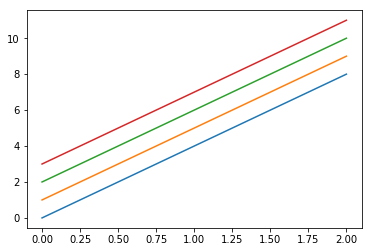

In [67]:
plt.plot(a)

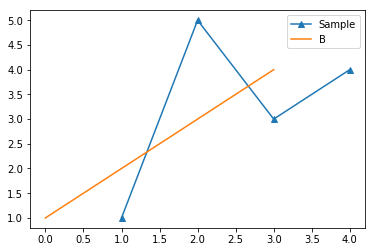

In [73]:
plt.plot([1,2,3,4],[1,5,3,4], '-^', label='Sample') # X,Y
plt.plot([1,2,3,4], label='B')
plt.legend()

## Unit 6 기온 데이터를 다양하게 시각화 하기 (p77)
##### 서울 데이터는 p29에 받는 방법이 나옵니다(seoul.csv)

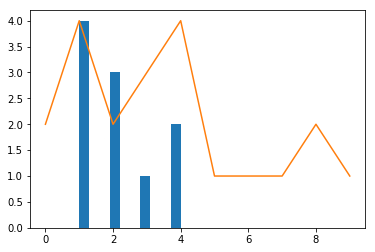

In [87]:
# p89 히스토그램
import matplotlib.pyplot as plt
x = np.random.randint(1,5,size=(10))
plt.hist(x)
plt.plot(x)

In [90]:
# 천번의 주사위 던지기 기록을 생성합니다
x = np.random.randint(low=1,high=7, size=(1000))

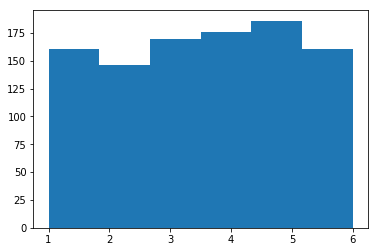

In [96]:
n = plt.hist(x, bins=6) # 6개의 막대로 표현하기

In [164]:
import csv
f = open('seoul.csv')
f

<_io.TextIOWrapper name='seoul.csv' mode='r' encoding='cp949'>

In [165]:
data = csv.reader(f) # p83
next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [166]:
date = next(data)

In [167]:
date[0].split('-')[1] == '06'

False

- 지난 100년간 6월19일의 최고기온의 히스토그램을 그리세요
- p85,86 처럼 8월과 1월의 최고기온 히스토그램을 동시에 그리세요

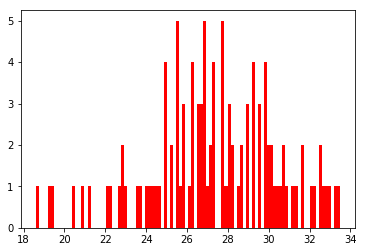

In [242]:
f = open('seoul.csv')
data = csv.reader(f) # p83
next(data)

result = [] # 비어있는 리스트를 준비
# 누락된 기온 ''
for row in data: # 한줄 한줄 꺼낸다
    if row[-1] != '': # 누락되어 있지 않으면
        #8월이냐
        if row[0].split('-')[1] =='06' and row[0].split('-')[2]=='19': # 6월 19일의 100년간 기록은?
            result.append(float(row[-1])) # 최고기온을 실수로 변환해서 저장
            
#plt.figure(figsize=(3,1,2))
n = plt.hist(result, bins=100, color='r')

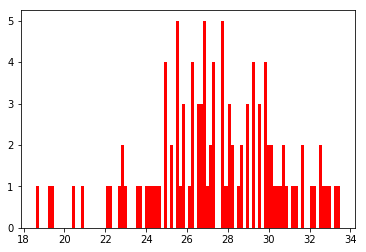

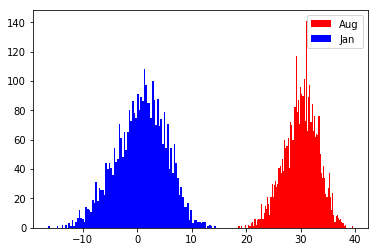

In [178]:
# p85,86 처럼 8월과 1월의 최고기온 히스토그램을 동시에 그리세요

f = open('seoul.csv')
data = csv.reader(f) # p83
aug = [] # 8월
jan = [] # 1월

next(data)
# 누락된 기온 ''
for row in data: # 한줄 한줄 꺼낸다
    if row[-1] != '': # 누락되어 있지 않으면
        #8월이냐
        if row[0].split('-')[1] =='08':
            aug.append(float(row[-1])) # 최고기온을 실수로 변환해서 저장
        elif row[0].split('-')[1] == '01':
            jan.append(float(row[-1]))
a = plt.hist(aug, bins=100, color='red', label='Aug')
b = plt.hist(jan, bins=100, color='blue', label='Jan')
plt.legend()

In [221]:
f = open('seoul.csv')
data = csv.reader(f) # p83
next(data)

rows = []
for row in data:
    rows.append(row)
len(rows)

40365

상자 그림(box plot) p86

In [238]:
x = np.array([1,2,3,4, 10,11,12,20,11,23,12, -10])
np.mean(x), np.median(x)

(8.25, 10.5)

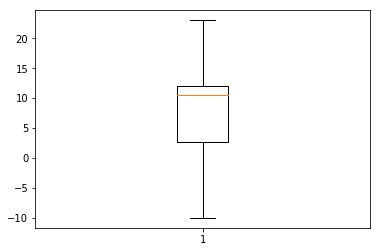

In [240]:
n=plt.boxplot(x) # 데이터를 정규분포로 표현했을 때 그 범위를 벗어나면 이상치(동그라미 표시)

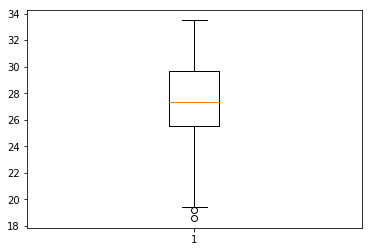

In [243]:
n = plt.boxplot(result) # 6월19일 온도

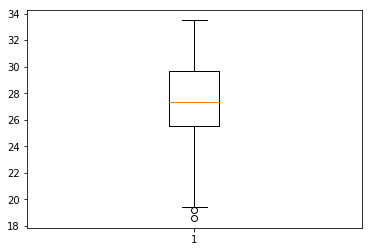

In [244]:
f = open('seoul.csv')
data = csv.reader(f) # p83
next(data)

result = [] # 비어있는 리스트를 준비
# 누락된 기온 ''
for row in data: # 한줄 한줄 꺼낸다
    if row[-1] != '': # 누락되어 있지 않으면
        #8월이냐
        if row[0].split('-')[1] =='06' and row[0].split('-')[2]=='19': # 6월 19일의 100년간 기록은?
            result.append(float(row[-1])) # 최고기온을 실수로 변환해서 저장
n = plt.boxplot(result) # 6월19일 온도

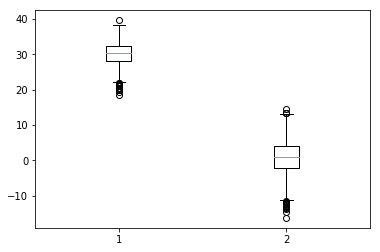

In [250]:
#n = plt.boxplot(aug) # 8월 온도
#n = plt.boxplot(jan) # 1월 온도
n = plt.boxplot([aug,jan]) # 8월, 1월 온도

In [270]:
import pandas as pd
data = pd.read_csv('seoul.csv',encoding='cp949')
data = data.dropna() # 전처리 : 누락된 값이 있으면 그 행은 버린다
data.head() # 상위 5건

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [273]:
month = []
for i in range(12):
    month.append([])
x = np.array(data)
x.shape, x[0]

((39607, 5), array(['1907-10-01', 108, 13.5, 7.9, 20.7], dtype=object))

In [274]:
np.mean(x[:,-1])

16.711336379932618

In [283]:
# 탐색적 프로그래밍

for i in range(len(x)):
    row = x[i]
    date = row[0]
    high = row[-1]
    mon = date.split('-')[1]
    # 1월은 0번째 위치에 저장해야 하므로 -1
    month[int(mon)-1].append(high) 

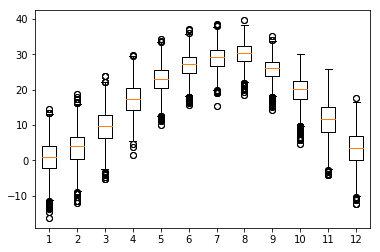

In [285]:
m = plt.boxplot(month)